<a href="https://colab.research.google.com/github/khushisood007/Portfolio-Optimizer/blob/main/portfolio_optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import yfinance as yf
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, expected_returns
import matplotlib.pyplot as plt

In [24]:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
start_date = '2023-01-01'
end_date = '2025-12-31'
data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)['Adj Close']
data.tail()

[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2025-10-28,269.000000,229.250000,267.470001,542.070007,460.549988
2025-10-29,269.700012,230.300003,274.570007,541.549988,461.510010
2025-10-30,271.399994,222.860001,281.480011,525.760010,440.100006
2025-10-31,270.369995,244.220001,281.190002,517.809998,456.559998
2025-11-03,269.049988,254.000000,283.720001,517.030029,468.369995


In [25]:
mu = expected_returns.mean_historical_return(data)
S = risk_models.sample_cov(data)

print("Expected Annual Returns:")
print(mu)

Expected Annual Returns:
Ticker
AAPL     0.318462
AMZN     0.469006
GOOGL    0.511145
MSFT     0.323585
TSLA     0.681467
dtype: float64


In [26]:
ef = EfficientFrontier(mu, S)

# Optimize for Maximum Sharpe Ratio
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()

# Display Results
print("Optimized Portfolio Weights:")
for stock, weight in cleaned_weights.items():
    print(f"{stock}: {weight:.2%}")

Optimized Portfolio Weights:
AAPL: 10.44%
AMZN: 16.38%
GOOGL: 45.86%
MSFT: 20.17%
TSLA: 7.16%


In [27]:
et, vol, sharpe = ef.portfolio_performance(verbose=True)

Expected annual return: 45.8%
Annual volatility: 24.5%
Sharpe Ratio: 1.87


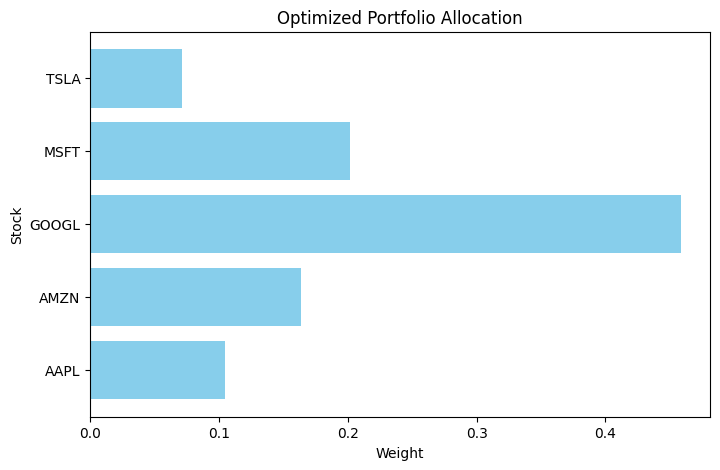

In [28]:
plt.figure(figsize=(8,5))
plt.barh(list(cleaned_weights.keys()), list(cleaned_weights.values()), color='skyblue')
plt.xlabel('Weight')
plt.ylabel('Stock')
plt.title('Optimized Portfolio Allocation')
plt.show()

In [29]:
portfolio_df = pd.DataFrame(list(cleaned_weights.items()), columns=['Stock', 'Weight'])
portfolio_df.to_csv('optimized_portfolio.csv', index=False)
portfolio_df

,Stock,Weight
0,AAPL,0.10441
1,AMZN,0.16376
2,GOOGL,0.45856
3,MSFT,0.20167
4,TSLA,0.07161


In [30]:
data.to_csv("stock_data.csv")

In [31]:
!git config --global user.name "khushisood007"
!git config --global user.email "khushisood01@gmail.com"

In [22]:
!git clone https://github.com/YourUsername/portfolio-optimizer.git


Cloning into 'portfolio-optimizer'...
fatal: could not read Username for 'https://github.com': No such device or address
